# Apple and Tesla Split on 8/31

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Coronavirus 2nd Wave
title = "Apple and Tesla"
symbols = ['AAPL', 'TSLA']
start = '2020-01-01'
end = '2020-08-31'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

242

In [7]:
df.head()

,AAPL,TSLA
Date,,
2020-01-02,74.573036,86.052002
2020-01-03,73.848030,88.601997
2020-01-06,74.436470,90.307999
2020-01-07,74.086395,93.811996
2020-01-08,75.278160,98.428001


In [8]:
df.tail()

,AAPL,TSLA
Date,,
2020-08-25,124.824997,404.667999
2020-08-26,126.522499,430.634003
2020-08-27,125.010002,447.750000
2020-08-28,124.807503,442.679993
2020-08-31,NaN,NaN


In [9]:
df.min()

AAPL    55.840385
TSLA    72.244003
dtype: float64

In [10]:
df.max()

AAPL    126.522499
TSLA    447.750000
dtype: float64

In [11]:
df.describe()

,AAPL,TSLA
count,167.000000,167.000000
mean,82.843209,188.159688
std,16.027406,87.092657
min,55.840385,72.244003
25%,71.973801,127.504002
50%,79.166336,160.666000
75%,91.040852,219.944000
max,126.522499,447.750000


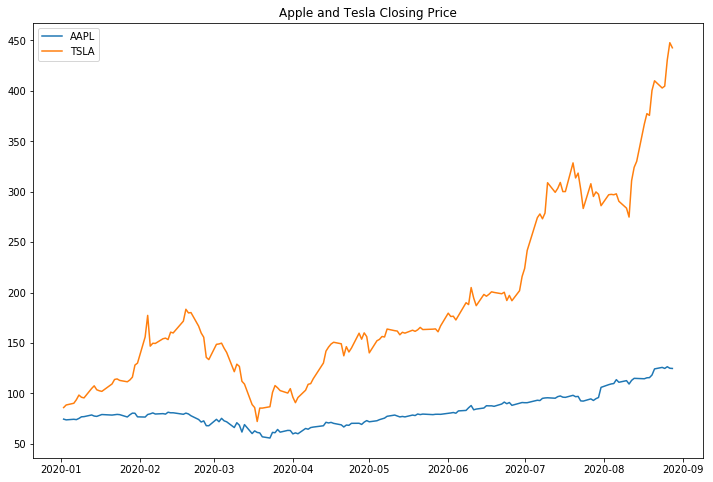

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [13]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

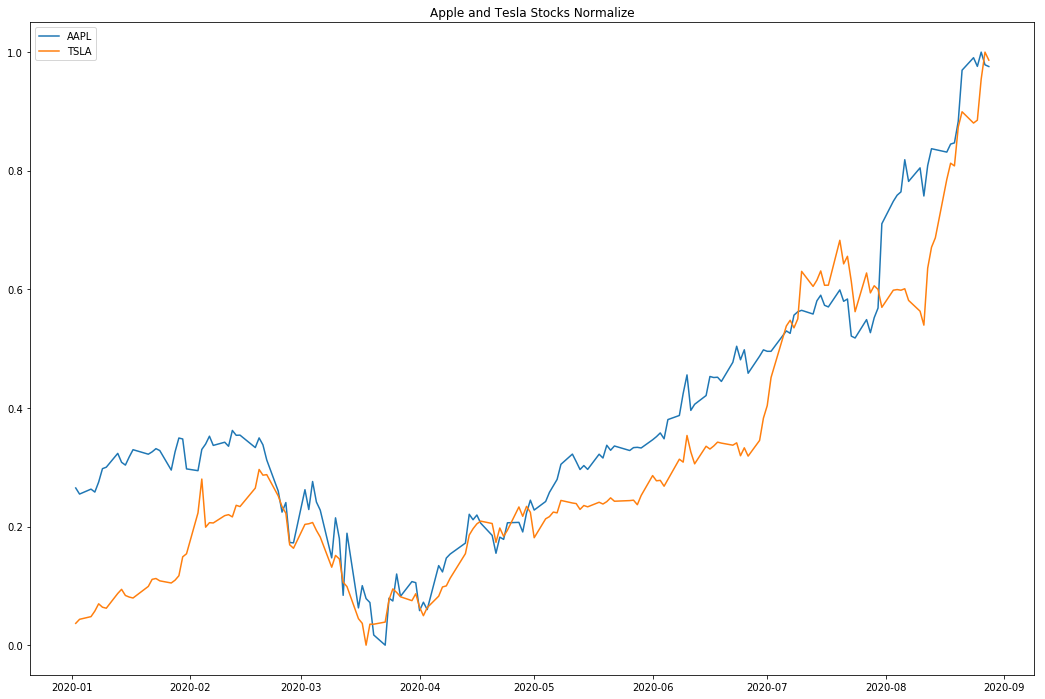

In [14]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [15]:
stock_rets = df.pct_change().dropna()

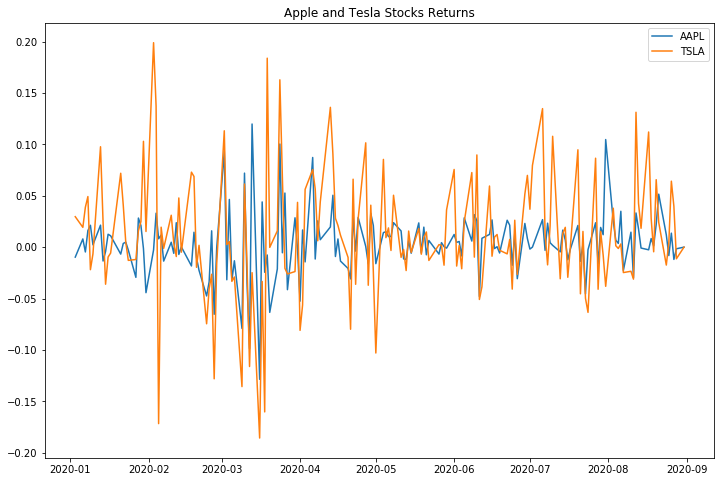

In [16]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

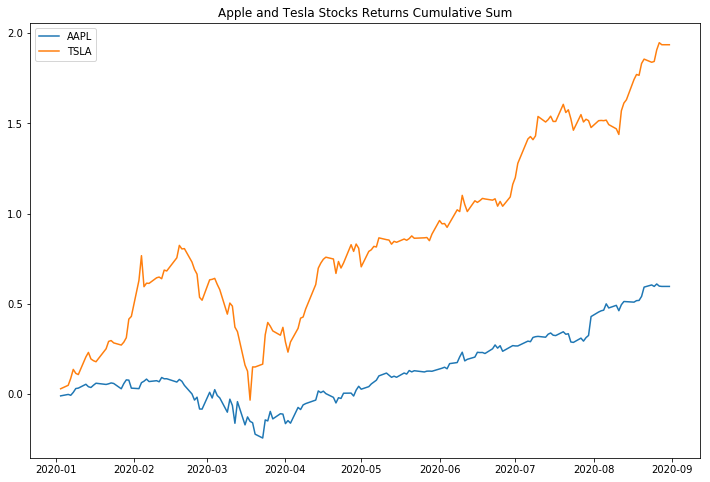

In [17]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

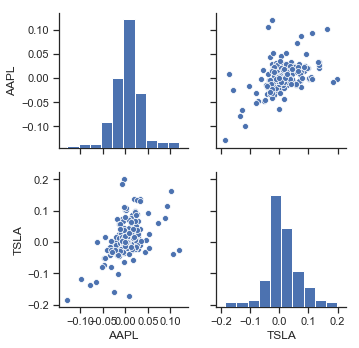

In [18]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

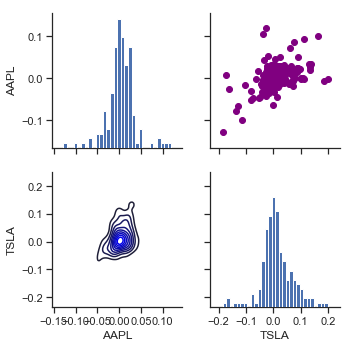

In [19]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

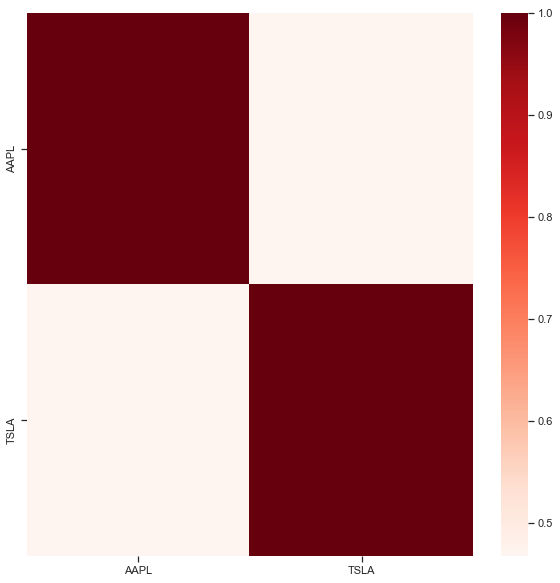

In [20]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

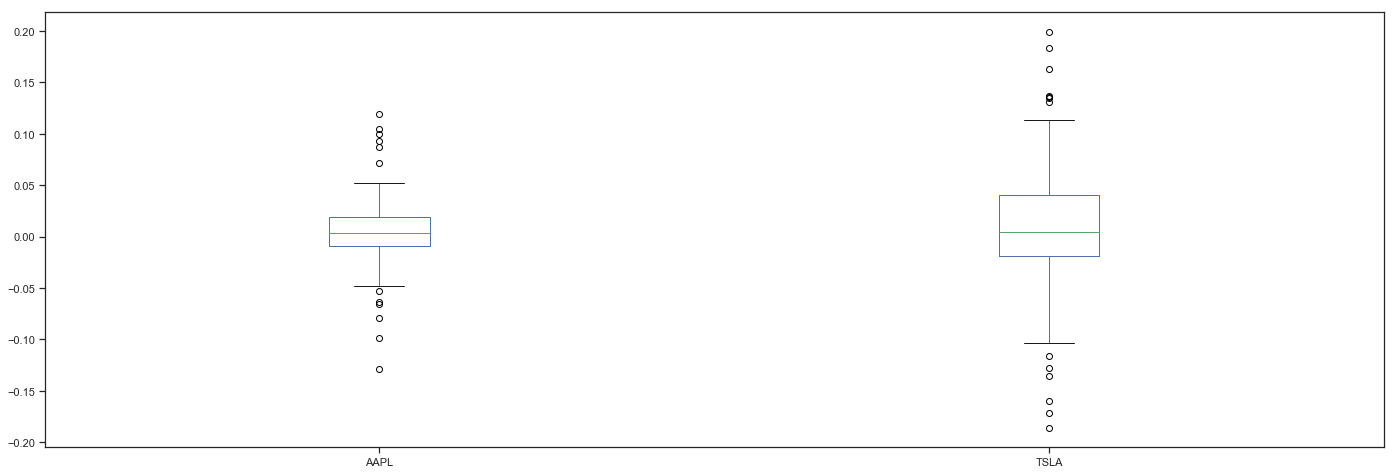

In [21]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

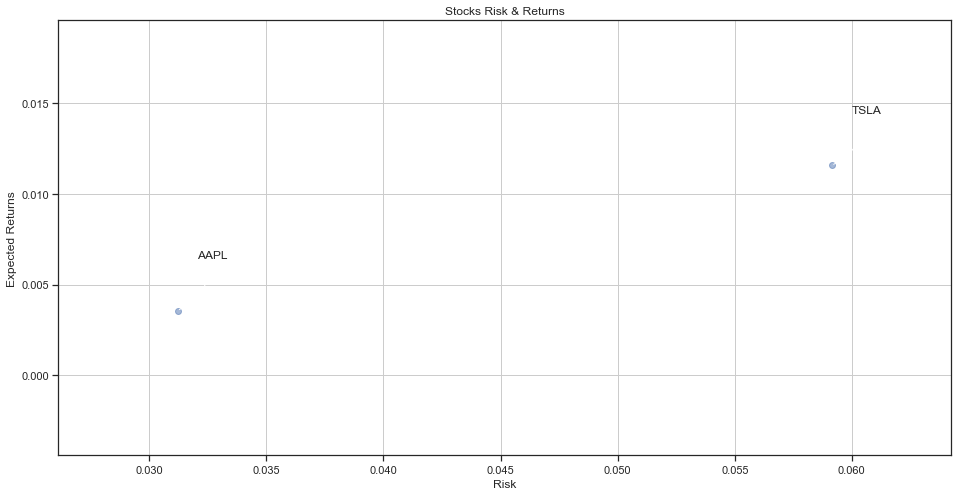

In [22]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

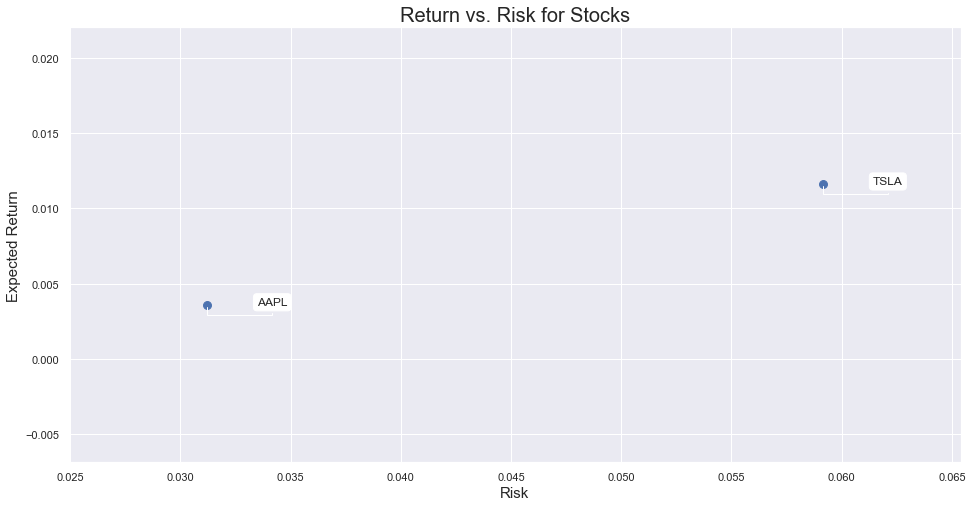

In [23]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [24]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [25]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
AAPL,0.900223,0.495463
TSLA,2.920598,0.938995


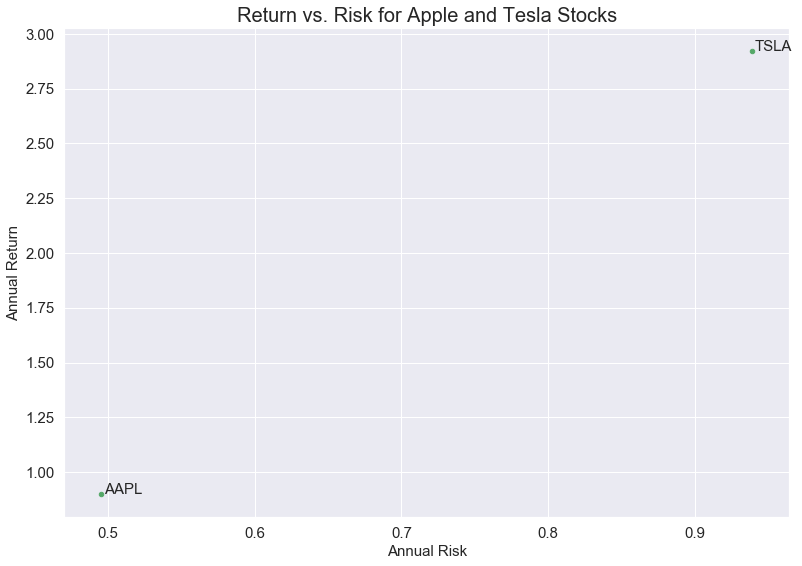

In [26]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [27]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

TSLA  TSLA    1.000000
AAPL  AAPL    1.000000
TSLA  AAPL    0.467117
AAPL  TSLA    0.467117
dtype: float64

In [28]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AAPL,TSLA
Date,,
2020-01-03,0.478657,0.559907
2020-01-06,0.549859,0.532931
2020-01-07,0.498858,0.583735
2020-01-08,0.582532,0.610779
2020-01-09,0.603279,0.425843


In [29]:
Normalized_Value.corr()

,AAPL,TSLA
AAPL,1.000000,0.467117
TSLA,0.467117,1.000000


In [30]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

TSLA  TSLA    1.000000
AAPL  AAPL    1.000000
TSLA  AAPL    0.467117
AAPL  TSLA    0.467117
dtype: float64

In [31]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAPL    0.003572
TSLA    0.011590
dtype: float64
--------------------------------------------------
Stock risks:
AAPL    0.031211
TSLA    0.059151
dtype: float64


In [32]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
AAPL,0.003572,0.031211
TSLA,0.011590,0.059151


In [33]:
table.sort_values(by='Risk')

,Returns,Risk
AAPL,0.003572,0.031211
TSLA,0.011590,0.059151


In [34]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AAPL,0.003572,0.031211,-0.205941
TSLA,0.011590,0.059151,0.026875


In [35]:
table['Max Returns'] = rets.max()

In [36]:
table['Min Returns'] = rets.min()

In [37]:
table['Median Returns'] = rets.median()

In [38]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AAPL,0.003572,0.031211,-0.205941,0.119808,-0.128647,0.003570,0.0
TSLA,0.011590,0.059151,0.026875,0.198949,-0.185778,0.004635,0.0


In [39]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
AAPL,0.003572,0.031211,-0.205941,0.119808,-0.128647,0.003570,0.0,0.0
TSLA,0.011590,0.059151,0.026875,0.198949,-0.185778,0.004635,0.0,0.0


In [40]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AAPL,0.003572,0.031211,-0.205941,0.119808,-0.128647,0.003570,0.0,0.0,NaN
TSLA,0.011590,0.059151,0.026875,0.198949,-0.185778,0.004635,0.0,0.0,NaN


In [41]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AAPL,0.003572,0.031211,-0.205941,0.119808,-0.128647,0.003570,0.0,0.0,NaN
TSLA,0.011590,0.059151,0.026875,0.198949,-0.185778,0.004635,0.0,0.0,NaN
